# Running a LAMMPS job in pyiron

This notebook __doesn't__ work out of the box if you haven't configured LAMMPS for pyiron

conda install -c conda-forge lammps 
OR
mamba install -c conda-forge lammps

In the python environment in which you are running pyiron

WARNING: In practice/production you should configure a compiled LAMMPS executable that is optimised for your cluster!

In [1]:
from pyiron.project import Project

In [2]:
pr = Project("run_lammps_calc")

Create the structure that we're going to use:
128 atom BCC Fe cell

In [3]:
structure = pr.create.structure.ase.bulk("Fe",crystalstructure="bcc", cubic=True)

Create the pyiron job, assign the structure to the job.

In [4]:
job = pr.create_job(job_type=pr.job_type.Lammps, job_name='Al_T800K')

job.structure = structure

We need to see the potentials, pyiron has an inbuilt potential database

It automatically finds the applicable potentials given the structure provided.

In [5]:
job.list_potentials()

['1997--Ackland-G-J--Fe--LAMMPS--ipr1',
 '1998--Meyer-R--Fe--LAMMPS--ipr1',
 '2001--Lee-B-J--Fe--LAMMPS--ipr1',
 '2001--Lee-B-J--Fe-Cr--LAMMPS--ipr1',
 '2003--Mendelev-M-I--Fe-2--LAMMPS--ipr3',
 '2003--Mendelev-M-I--Fe-5--LAMMPS--ipr1',
 '2004--Ackland-G-J--Fe-P--LAMMPS--ipr1',
 '2004--Zhou-X-W--Fe--LAMMPS--ipr2',
 '2005--Lee-B-J--Fe-Cu--LAMMPS--ipr1',
 '2005--Mendelev-M-I--Al-Fe--LAMMPS--ipr1',
 '2006--Chamati-H--Fe--LAMMPS--ipr1',
 '2006--Kim-J--Fe-Pt--LAMMPS--ipr1',
 '2006--Lee-B-J--Fe-C--LAMMPS--ipr1',
 '2006--Lee-B-J--Fe-N--LAMMPS--ipr1',
 '2007--Lee-B-J--Fe-H--LAMMPS--ipr1',
 '2007--Mendelev-M-I--V-Fe--LAMMPS--ipr1',
 '2008--Hepburn-D-J--Fe-C--LAMMPS--ipr1',
 '2008--Sa-I--Fe-Nb--LAMMPS--ipr1',
 '2008--Sa-I--Fe-Ti--LAMMPS--ipr1',
 '2009--Bonny-G--Fe-Cu-Ni--LAMMPS--ipr1',
 '2009--Bonny-G--Fe-Ni--LAMMPS--ipr1',
 '2009--Kim-H-K--Fe-Ti-C--LAMMPS--ipr2',
 '2009--Kim-Y-M--Fe-Mn--LAMMPS--ipr1',
 '2009--Olsson-P-A-T--Fe--LAMMPS--ipr1',
 '2009--Stukowski-A--Fe-Cr--LAMMPS--ipr1',
 '2010--Ki

Set the potential 

In [6]:
pot = job.list_potentials()[0]
job.potential = pot
print ('Selected potential: ', pot)

Selected potential:  1997--Ackland-G-J--Fe--LAMMPS--ipr1


Here we can use the calc_md() method attached to the lammps job.
Run at 0 pressure, temperature 1000K, for 10000 ionic steps @ 1fs/step

In [7]:
job.calc_md(temperature=1000,
            pressure=0,
            n_ionic_steps=10000,
            timestep=1)
job.run()

TypeError: LammpsInteractive.calc_md() got an unexpected keyword argument 'timestep'

Look at output

In [ ]:
job['output']

{'groups': ['generic', 'structure'], 'nodes': []}

In [ ]:
job['output/generic/energy_tot']

array([-526.17114488, -526.57621383, -525.69531783, -525.55762356,
       -525.66110013, -525.8173434 , -526.20809109, -527.89629215,
       -529.21539394, -528.10865025, -526.17408517, -525.87745527,
       -525.49746874, -525.69202846, -526.90133547, -528.12387997,
       -527.59735876, -525.03204861, -524.37627623, -525.79859142,
       -526.48603873, -527.30027375, -526.61276712, -524.46082859,
       -523.96489631, -525.33281983, -527.2149574 , -527.08325463,
       -526.37621082, -525.25877697, -523.00758781, -521.40493486,
       -523.73179651, -525.03799276, -526.46000886, -527.18188496,
       -526.84633607, -524.48014893, -523.5428624 , -525.05035221,
       -526.07182477, -526.30456978, -526.34046043, -524.89611761,
       -522.61808904, -523.56054178, -525.15619667, -525.81350063,
       -526.12772674, -526.51569419, -526.84588588, -526.25152273,
       -525.35128331, -523.95485411, -524.28554967, -526.42151183,
       -526.53244221, -526.5111831 , -525.01857209, -524.05358

Get the z coordinate of the 5th atom in the structure for every single frame

In [ ]:
third_coordinate = job['output/generic/positions'][:, 5, 2]
print(third_coordinate)

[1.435      1.49356223 1.50533036 1.46473251 1.53939318 1.33564455
 1.40801907 1.44178179 1.46191807 1.4121123  1.55743805 1.34048975
 1.40088691 1.52494007 1.24238535 1.47457541 1.39999343 1.5037083
 1.40876076 1.4616233  1.38676245 1.64419493 1.48055191 1.4785456
 1.39603338 1.35858652 1.42890166 1.46654335 1.29592305 1.68563204
 1.39495785 1.42749432 1.3081688  1.49963476 1.43506238 1.49852144
 1.24324457 1.67757219 1.44076672 1.20739568 1.54944799 1.36676148
 1.47711709 1.56452045 1.37447567 1.39064565 1.57643321 1.43676741
 1.40015173 1.50981144 1.38867736 1.57109236 1.2856254  1.54594703
 1.31317637 1.61450317 1.33993643 1.47975716 1.29701602 1.60625725
 1.51985598 1.28531597 1.46949362 1.62701772 1.39252676 1.41475702
 1.41793559 1.49555017 1.36919977 1.29440109 1.45452688 1.4524996
 1.46974906 1.40388159 1.48605925 1.45328717 1.51845165 1.3794458
 1.31442195 1.602098   1.32275338 1.27952894 1.44805984 1.39320421
 1.61547194 1.53745005 1.47044878 1.57396901 1.40890561 1.33268622

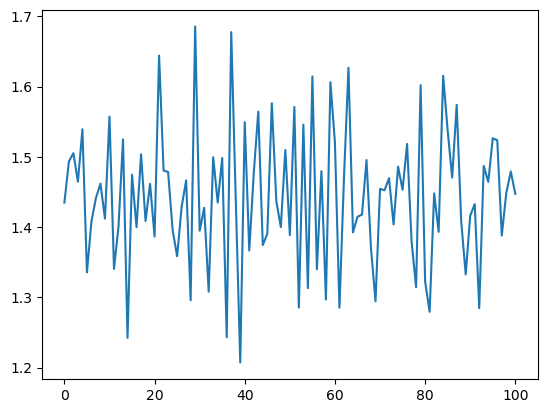

In [ ]:
import matplotlib.pyplot as plt

plt.plot(third_coordinate)

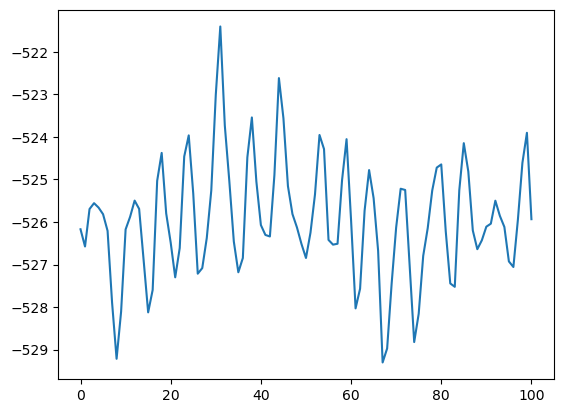

In [ ]:
plt.plot(job['output/generic/energy_tot'])

If NGLView is installed, we can also plot an animated trajectory of the atoms:

In [ ]:
job.animate_structures()

NGLWidget(max_frame=100)